In [405]:


import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns


In [406]:
data = pd.read_csv("insurance.csv")

# Assistant
The error occurs because you're trying to use the pandas library (pd) without importing it first. The "pd" alias is not defined in your current environment.

Would you like me to provide the corrected code?

In [407]:
df = data

In [408]:
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [409]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [411]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


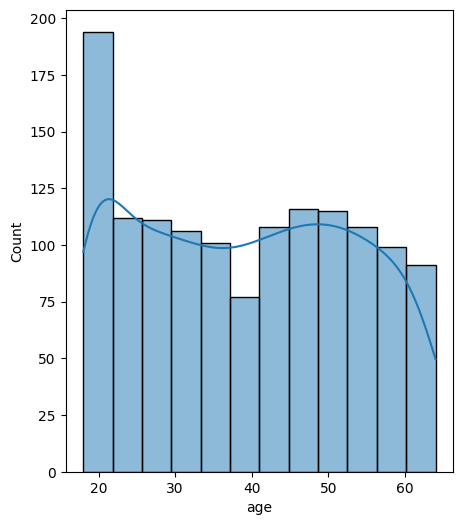

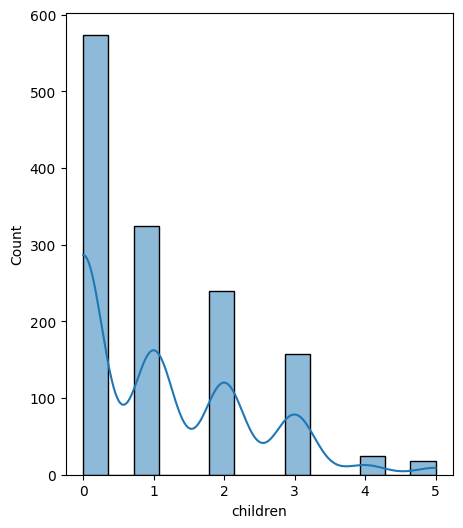

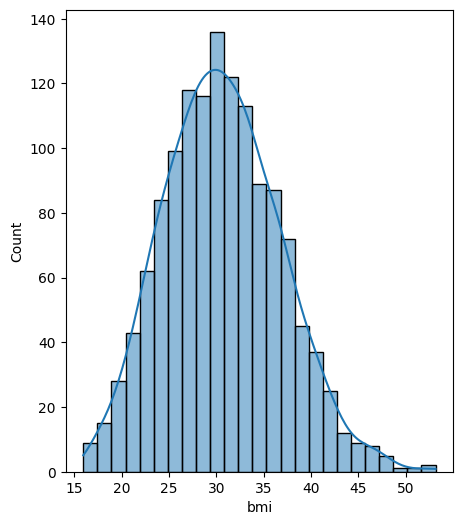

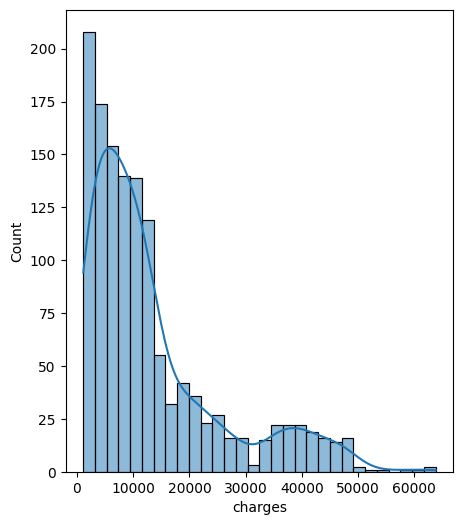

In [413]:
ncol=['age', 'children', 'bmi', 'charges']
for col in ncol:
    plt.figure(figsize=(5,6))
    sns.histplot(df[col], kde = True)

<Axes: xlabel='children', ylabel='count'>

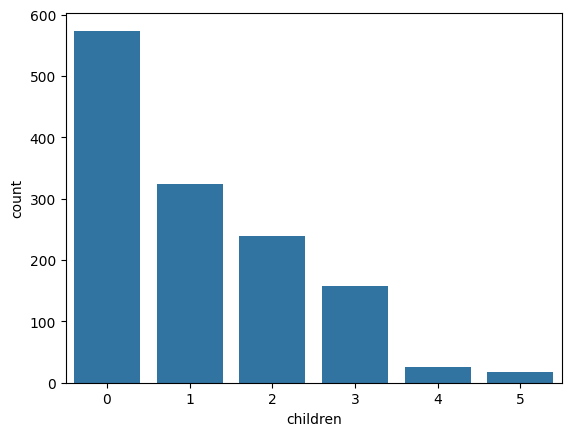

In [414]:

sns.countplot(x=df['children'])


<Axes: xlabel='sex', ylabel='count'>

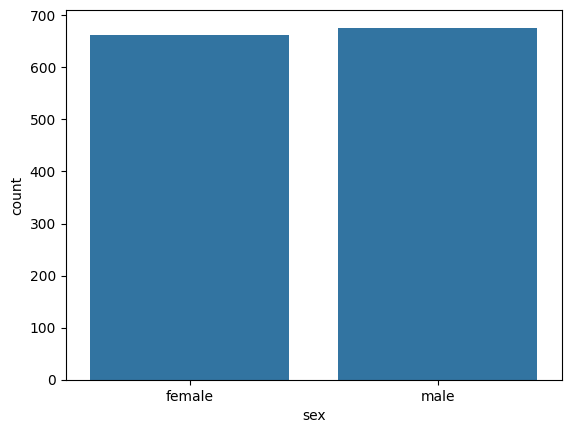

In [415]:
sns.countplot(x=df['sex'])

<Axes: xlabel='age', ylabel='count'>

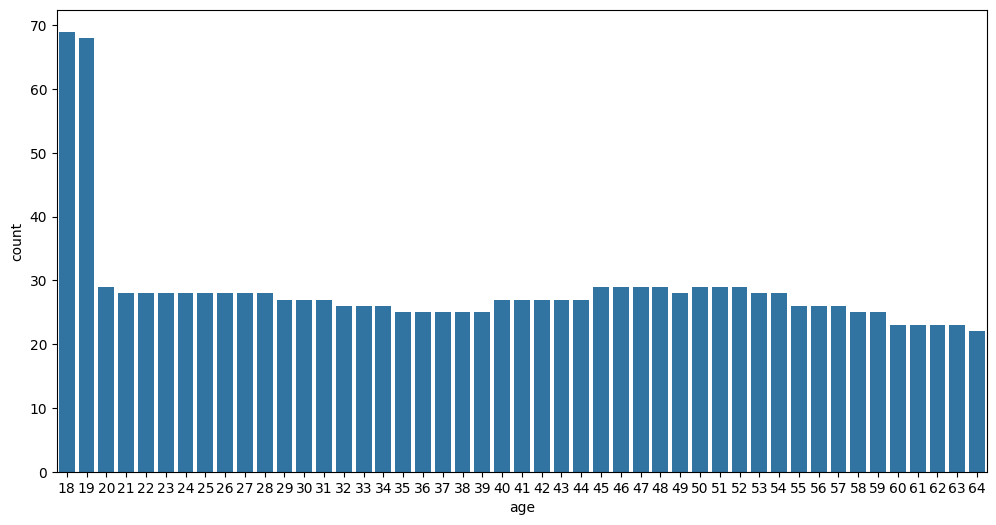

In [416]:
plt.figure(figsize=(12,6))

sns.countplot(x=df['age'])



<Axes: xlabel='smoker', ylabel='count'>

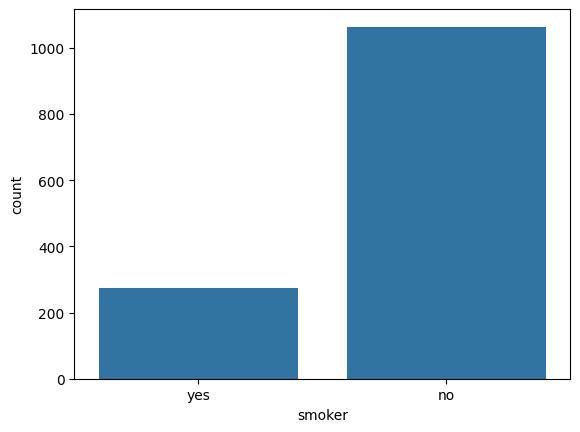

In [417]:
sns.countplot(x=df['smoker'])

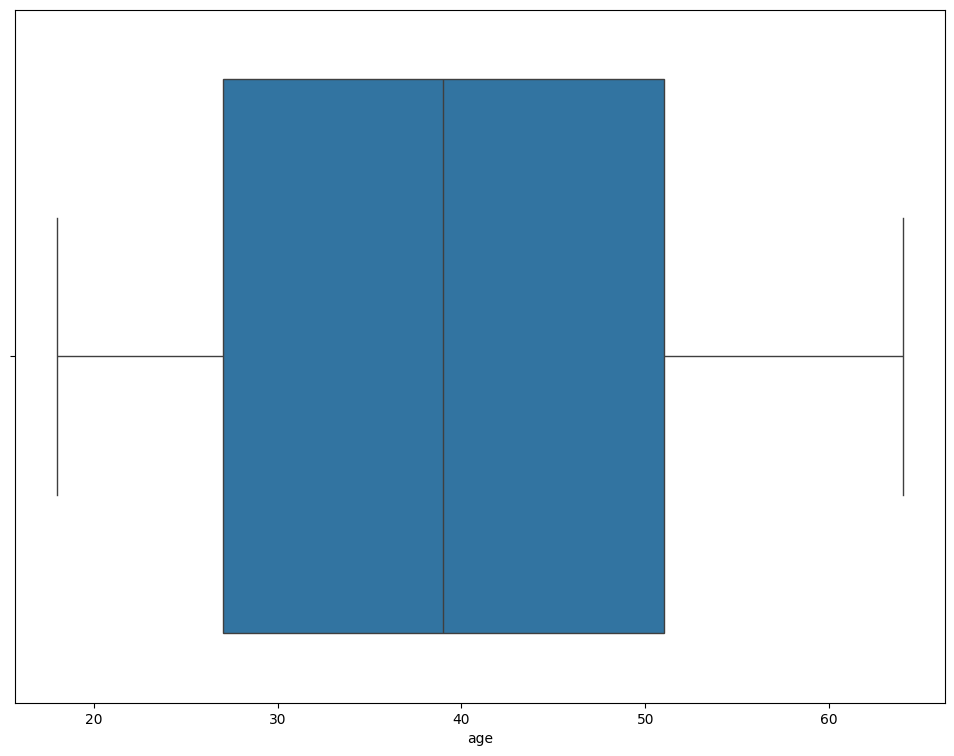

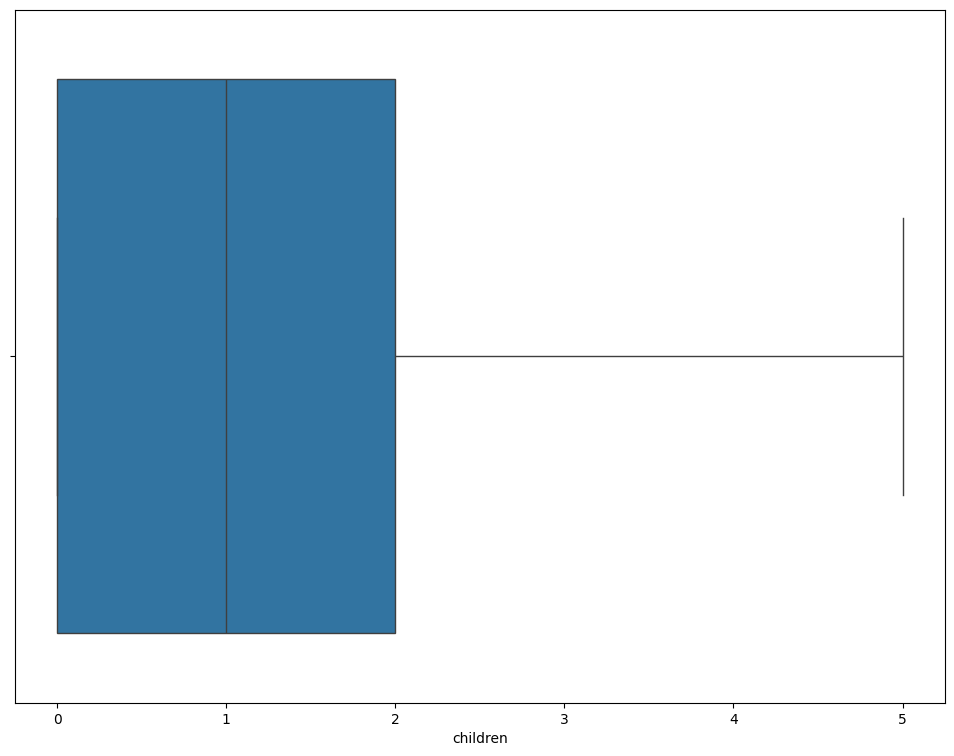

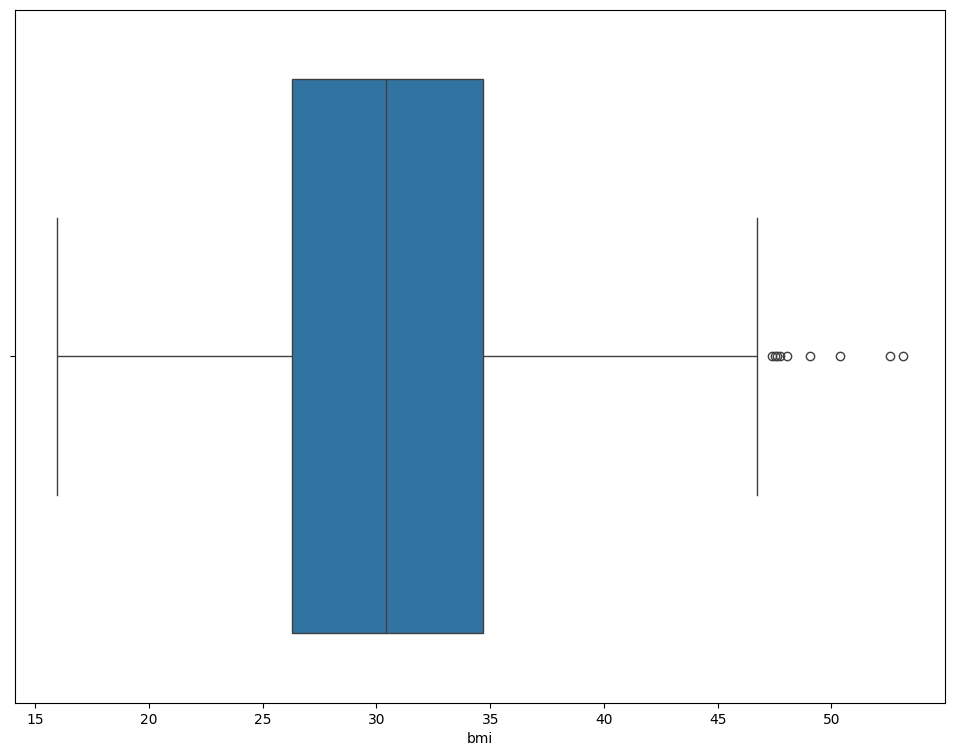

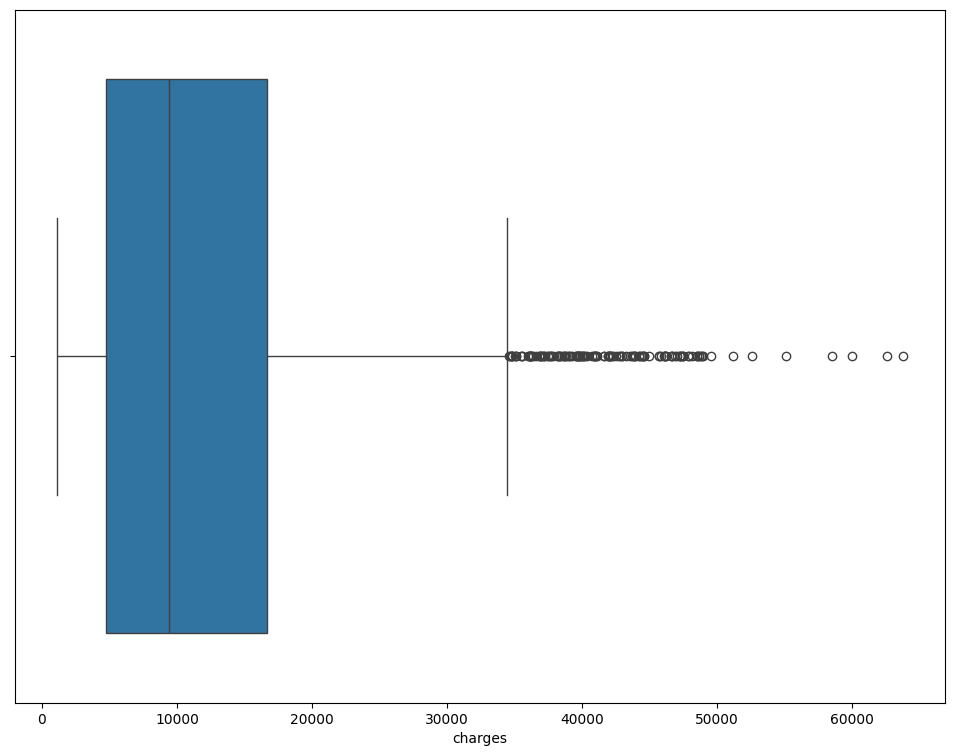

In [418]:
for col in ncol:
    plt.figure(figsize=(12,9))
    sns.boxplot(x=df[col])
               

<Axes: >

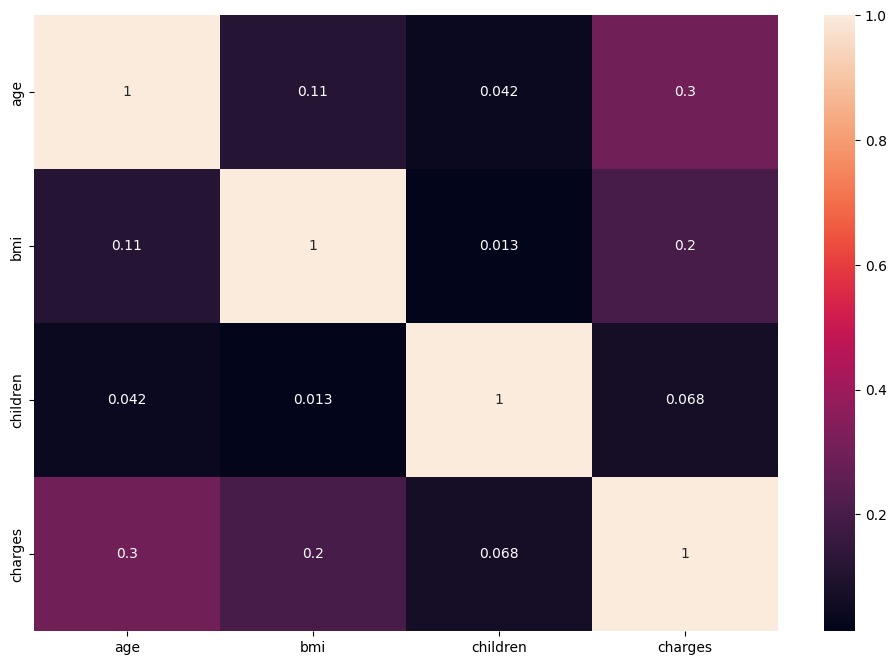

In [419]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

#*DATA CLEANING AND PREPROCESSING*#



In [420]:
df_cl=df.copy()

In [421]:
df_cl

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [422]:
df.shape

(1338, 7)

In [423]:
df_cl.drop_duplicates(inplace = True)

In [424]:
df_cl.shape

(1337, 7)

In [425]:
df_cl.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [426]:
df_cl['sex']= df_cl['sex'].map({"male":0, "female":1})

In [427]:
df_cl['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [428]:
df_cl ['smoker'] = df_cl['smoker'].map({"no": 0, "yes": 1})

In [429]:
df_cl

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [430]:
df_cl = df_cl.rename(columns={ 'sex' : 'is_female', 'smoker' : 'is_smoker', 
                     })

In [431]:
df_cl['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [432]:
df_cl = pd.get_dummies(df_cl, columns = ['region'], drop_first=True)

In [433]:
df_cl.head

<bound method NDFrame.head of       age  is_female     bmi  children  is_smoker      charges  \
0      19          1  27.900         0          1  16884.92400   
1      18          0  33.770         1          0   1725.55230   
2      28          0  33.000         3          0   4449.46200   
3      33          0  22.705         0          0  21984.47061   
4      32          0  28.880         0          0   3866.85520   
...   ...        ...     ...       ...        ...          ...   
1333   50          0  30.970         3          0  10600.54830   
1334   18          1  31.920         0          0   2205.98080   
1335   18          1  36.850         0          0   1629.83350   
1336   21          1  25.800         0          0   2007.94500   
1337   61          1  29.070         0          1  29141.36030   

      region_northwest  region_southeast  region_southwest  
0                False             False              True  
1                False              True             Fa

# *feature engineering and extraction*


<Axes: xlabel='bmi', ylabel='Count'>

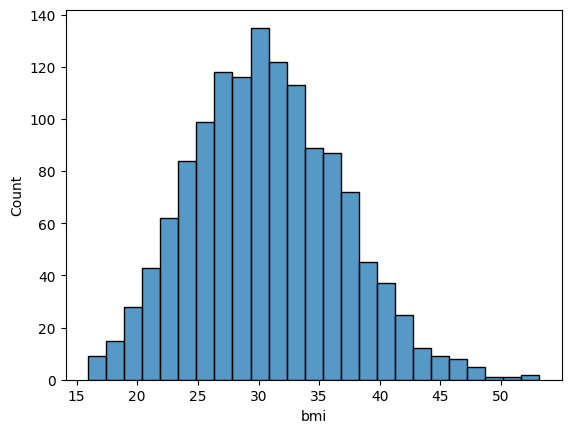

In [434]:
sns.histplot(df_cl['bmi'])

In [435]:
from sklearn.model_selection import train_test_split



In [436]:
df_cl['bmi_category'] = pd.cut(
    df_cl['bmi'],
bins =[0, 8, 18.5, 25, 29.9, float('inf')],
labels= ['need docter','underweight', 'normal', 'overweight', 'obese']
)

In [437]:
df_cl

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27.900,0,1,16884.92400,False,False,True,overweight
1,18,0,33.770,1,0,1725.55230,False,True,False,obese
2,28,0,33.000,3,0,4449.46200,False,True,False,obese
3,33,0,22.705,0,0,21984.47061,True,False,False,normal
4,32,0,28.880,0,0,3866.85520,True,False,False,overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,True,False,False,obese
1334,18,1,31.920,0,0,2205.98080,False,False,False,obese
1335,18,1,36.850,0,0,1629.83350,False,True,False,obese
1336,21,1,25.800,0,0,2007.94500,False,False,True,overweight


In [438]:
df_cl = pd.get_dummies(df_cl, columns = ['bmi_category'], drop_first=True)

In [439]:
df_cl

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_underweight,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27.900,0,1,16884.92400,False,False,True,False,False,True,False
1,18,0,33.770,1,0,1725.55230,False,True,False,False,False,False,True
2,28,0,33.000,3,0,4449.46200,False,True,False,False,False,False,True
3,33,0,22.705,0,0,21984.47061,True,False,False,False,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,True,False,False,False,False,False,True
1334,18,1,31.920,0,0,2205.98080,False,False,False,False,False,False,True
1335,18,1,36.850,0,0,1629.83350,False,True,False,False,False,False,True
1336,21,1,25.800,0,0,2007.94500,False,False,True,False,False,True,False


In [440]:
df_cl=df_cl.astype(int)

In [441]:
df_cl

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_underweight,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,19,1,27,0,1,16884,0,0,1,0,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,0,1,0


In [442]:
df_cl.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_underweight', 'bmi_category_normal',
       'bmi_category_overweight', 'bmi_category_obese'],
      dtype='object')

In [443]:
from sklearn.preprocessing import StandardScaler
cols= ['age', 'bmi', 'children']
scaler = StandardScaler()
df_cl[cols]=scaler.fit_transform(df_cl [cols]) 

In [444]:
df_cl

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_underweight,bmi_category_normal,bmi_category_overweight,bmi_category_obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,1,0,0,0,0,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,0,0,0,0,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,0,1,0,0,0,0,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,1,0,0,1,0


In [445]:
from scipy.stats import pearsonr
selected_features = [
'age', 'bmi', 'children', 'is_female', 'is_smoker',
'region_northwest', 'region_southeast', 'region_southwest',
'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese']

correlations = {
feature: pearsonr(df_cl[feature], df_cl['charges' ] ) [0]
for feature in selected_features}
corr_df = pd.DataFrame(list(correlations.items()), columns=['feature', 'Pearson Correlation'])
corr_df.sort_values(by='Pearson Correlation', ascending=False)


,feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_obese,0.197660
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi_category_normal,-0.105946


In [446]:
cat_features = [
'is_female', 'is_smoker',
'region_northwest', 'region_southeast', 'region_southwest',
'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese']

In [447]:
from scipy.stats import chi2_contingency
import pandas as pd
alpha =0.05
df_cl['charges_bin'] = pd.qcut(df_cl ['charges'], q =4, labels=False)
chi2_results = {}

for col in cat_features:

 contingency = pd.crosstab(df_cl[col], df_cl['charges_bin' ] )
 chi2_stat, p_val, _, _= chi2_contingency(contingency)
 decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
 chi2_results [col] = {
 'chi2_statistic': chi2_stat,
 'p_value': p_val,
 'Decision': decision
 }
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_obese,7.654464,0.05372,Accept Null (Drop Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_normal,3.605513,0.307333,Accept Null (Drop Feature)
bmi_category_overweight,3.553677,0.313867,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [448]:
final_df = df_cl [['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges', 'region_southeast' ]]

In [449]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast
0,-1.440418,1,-0.517949,-0.909234,1,16884,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1
2,-0.799350,0,0.462463,1.580143,0,4449,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0
...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0
1334,-1.511647,1,0.135659,-0.909234,0,2205,0
1335,-1.511647,1,0.952670,-0.909234,0,1629,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0


In [450]:
from sklearn.model_selection import train_test_split

In [451]:
X = final_df.drop ('charges', axis =1)
y= final_df['charges']

In [452]:
X_train, X_test, y_train, y_test= train_test_split (X, y, test_size=0.20, random_state=42)

In [453]:
from sklearn.linear_model import LinearRegression

In [454]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [455]:
y_pred = model.predict(X_test)

In [456]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-((1-r2)*(n-1)/ (n-p-1))
adjusted_r2

0.8009000376598621

In [457]:
y_test

900      8688
1064     5708
1256    11436
298     38746
237      4463
        ...  
534     13831
542     13887
760      3925
1284    47403
1285     8534
Name: charges, Length: 268, dtype: int64